### Import Libraries

In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
import category_encoders as ce
from sklearn.preprocessing import RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


### Set basic functions we need to call later on

In [28]:
def classification_metrics (y_test, y_pred):
    print("Accuracy is: ", accuracy_score(y_test, y_pred))
    print("Precision is: ", precision_score(y_test, y_pred))
    print("Recall is: ", recall_score(y_test, y_pred))
    print("F1-Score is: ", f1_score(y_test, y_pred))

In [29]:
def roc_curve_plot(y_test,y_pred,y_train, y_pred_train):
    plt.figure(figsize=(8,4))
    fpr, tpr, thresholds = roc_curve(y_test ,y_pred)
    fpr1, tpr1, thresholds1 = roc_curve(y_train ,y_pred_train)
    plt.plot(fpr, tpr)
    plt.plot(fpr1, tpr1)
    plt.xlabel("fpr")
    plt.ylabel("tpr")
    plt.title("ROC Curve")
    plt.show()

### Read  and explore csv

*area_code==>Variabli “area_code” është kodi i zonës për një rajon të caktuar është seria e numrave që duhet të telefononi përpara numrit personal të dikujt nëse jeni duke bërë një telefonatë në atë vend nga një zonë tjetër.
*phone_number==>Numri i telefonit të përdoruesve
---Features
*State==>Variabli “State”  i koduar me numra tregon një shtet specifik në datasetin tonë.
*account_length==> Gjatësia e llogarisë
*area_code==>Variabli “area_code” është kodi i zonës për një rajon të caktuar është seria e numrave që duhet të telefononi përpara numrit personal të dikujt nëse jeni duke bërë një telefonatë në atë vend nga një zonë tjetër.
*phone_number==>Numri i telefonit të përdoruesve
*international_plan==>Variabli “international_plan”  është një shërbim që  lejon të përdorni telefonin tuaj në vende të tjera
*voice_mail_plan==>Variabli "Voice_Mail_Plan" eshte një sistem i postës zanore, një sistem i bazuar në kompjuter që lejon përdoruesit dhe abonentët të shkëmbejnë mesazhe personale zanore;
*number_vmail_messages==>Numri i mesazheve Zanore
*total_day_minutes==>Minutat totale në ditë
*total_day_calls==>Telefonatat totale ditore
*total_day_charge==>Tarifat totale ditore
*total_eve_minutes==>Minutat totale në mbrëmje
*total_eve_calls==>Telefonatat totale në mbrëmje
*total_eve_charge==> Tarifat totale në mbrëmje
*total_night_minutes==> Minutat totale gjatë natës
*total_night_calls==> Telefonatat totale gjatë natës
*total_night_charge==> Tarifat totale gjatë natës
*total_intl_minutes==> Minutat totale ndërkombëtare
*total_intl_calls==> Telefonatat totale ndërkombëtare
*total_intl_charge==>Tarifat totale ndërkombëtare
*number_customer_service_calls==>Numri i thirrjeve të shërbimit ndaj klientit.
---Target
*class==> Variabli klas tregon nqfs klienti është larguar ose jo.

In [30]:
 churn = pd.read_csv('churn.csv')

In [31]:
churn.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [32]:
churn.shape

(5000, 21)

In [33]:
churn.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


In [34]:
churn.dtypes

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

In [35]:
churn.isnull().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

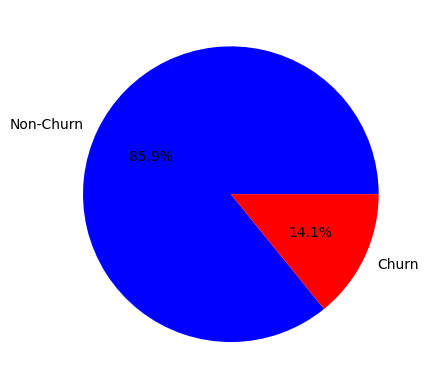

In [177]:
plt.pie(churn['class'].value_counts(normalize = True), labels = ["Non-Churn", "Churn"], autopct='%1.1f%%', colors=['blue', 'red']);

In [41]:
churn["class"].value_counts()

0    4293
1     707
Name: class, dtype: int64

In [118]:
churn['total_charge'] = churn['total_day_charge']+churn['total_night_charge']
                        +churn['total_intl_charge']+churn['total_eve_charge']

In [119]:
churn['total_minutes'] = churn['total_day_minutes']+churn['total_night_minutes']
                        +churn['total_intl_minutes']+churn['total_eve_minutes']

In [120]:
churn['total_calls'] = churn['total_day_calls']+churn['total_eve_calls']
                        +churn['total_intl_calls']+churn['total_eve_calls']

In [145]:
churn['price/min_day'] = churn['total_day_charge']/churn['total_day_minutes']

In [146]:
churn['price/min_night'] = churn['total_night_charge']/churn['total_night_minutes']

In [147]:
churn['price/min_intl'] = churn['total_intl_charge']/churn['total_intl_minutes']

In [148]:
churn.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class', 'total_charge',
       'total_minutes', 'total_calls', 'price/min_day', 'price/min_night',
       'price/min_intl'],
      dtype='object')

In [150]:
churn["price/min_day"].mean()

0.17000326121841491

In [151]:
churn['price/min_night'].mean()

0.045000537253483845

In [152]:
churn['price/min_intl'].mean()

0.2700583459059327

In [149]:
churn.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,class,total_charge,total_minutes,total_calls,price/min_day,price/min_night,price/min_intl
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,3,2.70,1,0,75.56,717.2,311,0.170011,0.044994,0.270000
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,3,3.70,1,0,59.24,625.2,332,0.169988,0.045008,0.270073
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,5,3.29,0,0,62.29,539.4,339,0.170008,0.045018,0.269672
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,7,1.78,2,0,66.80,564.8,254,0.170007,0.044997,0.269697
4,36,75,415,155,1,0,0,166.7,113,28.34,...,3,2.73,3,0,52.09,512.0,360,0.170006,0.044997,0.270297


In [154]:
churn.groupby('class').sum()[["total_day_charge", "total_night_charge", "total_intl_charge"]]

,total_day_charge,total_night_charge,total_intl_charge
class,,,
0,128264.08,38532.22,11814.57
1,24984.26,6556.44,2041.41


In [125]:
churn.groupby('class').total_charge.mean()

class
0    58.503795
1    65.499010
Name: total_charge, dtype: float64

In [128]:
churn.groupby('class').total_minutes.mean()

class
0    584.197577
1    636.399010
Name: total_minutes, dtype: float64

In [437]:
churn.groupby('class').total_minutes.sum()

class
0    2507960.2
1     449934.1
Name: total_minutes, dtype: float64

In [130]:
churn.groupby('class').number_customer_service_calls.sum()

class
0    6258
1    1594
Name: number_customer_service_calls, dtype: int64

In [439]:
6258/(1594+6258)

0.7969943963321446

In [438]:
1594/(1594+6258)

0.20300560366785533

In [440]:
1594+6258

7852

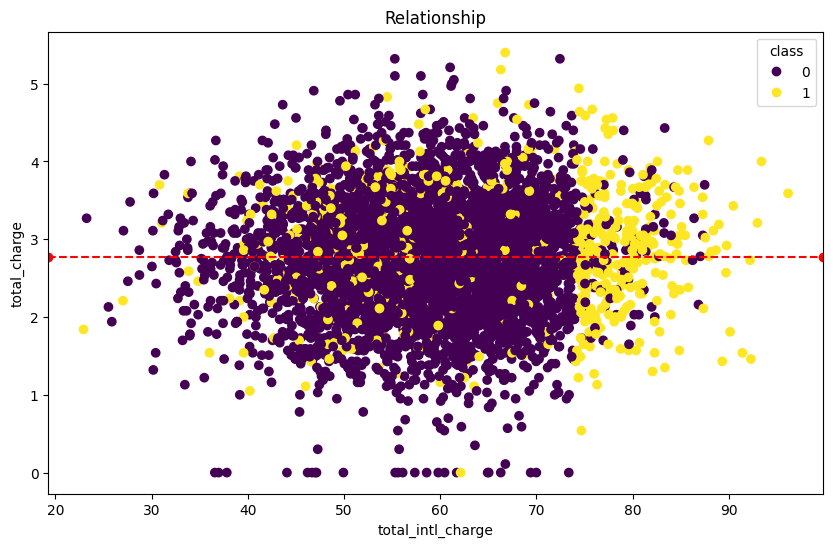

In [133]:
#Create the Plot
fig, ax = plt.subplots(figsize=(10,6))

#Plot the data 

scatter_plot = ax.scatter(churn['total_charge'], churn['total_intl_charge'], c=churn['class'])

#Customize the Plot

ax.set(title='Relationship', xlabel='total_intl_charge', ylabel='total_charge');
ax.legend(*scatter_plot.legend_elements(), title = "class");

#What if we wanted a horizontal line going across with the mean 
ax.axhline(churn['total_intl_charge'].mean(), linestyle = '--', color='r', marker ='o');


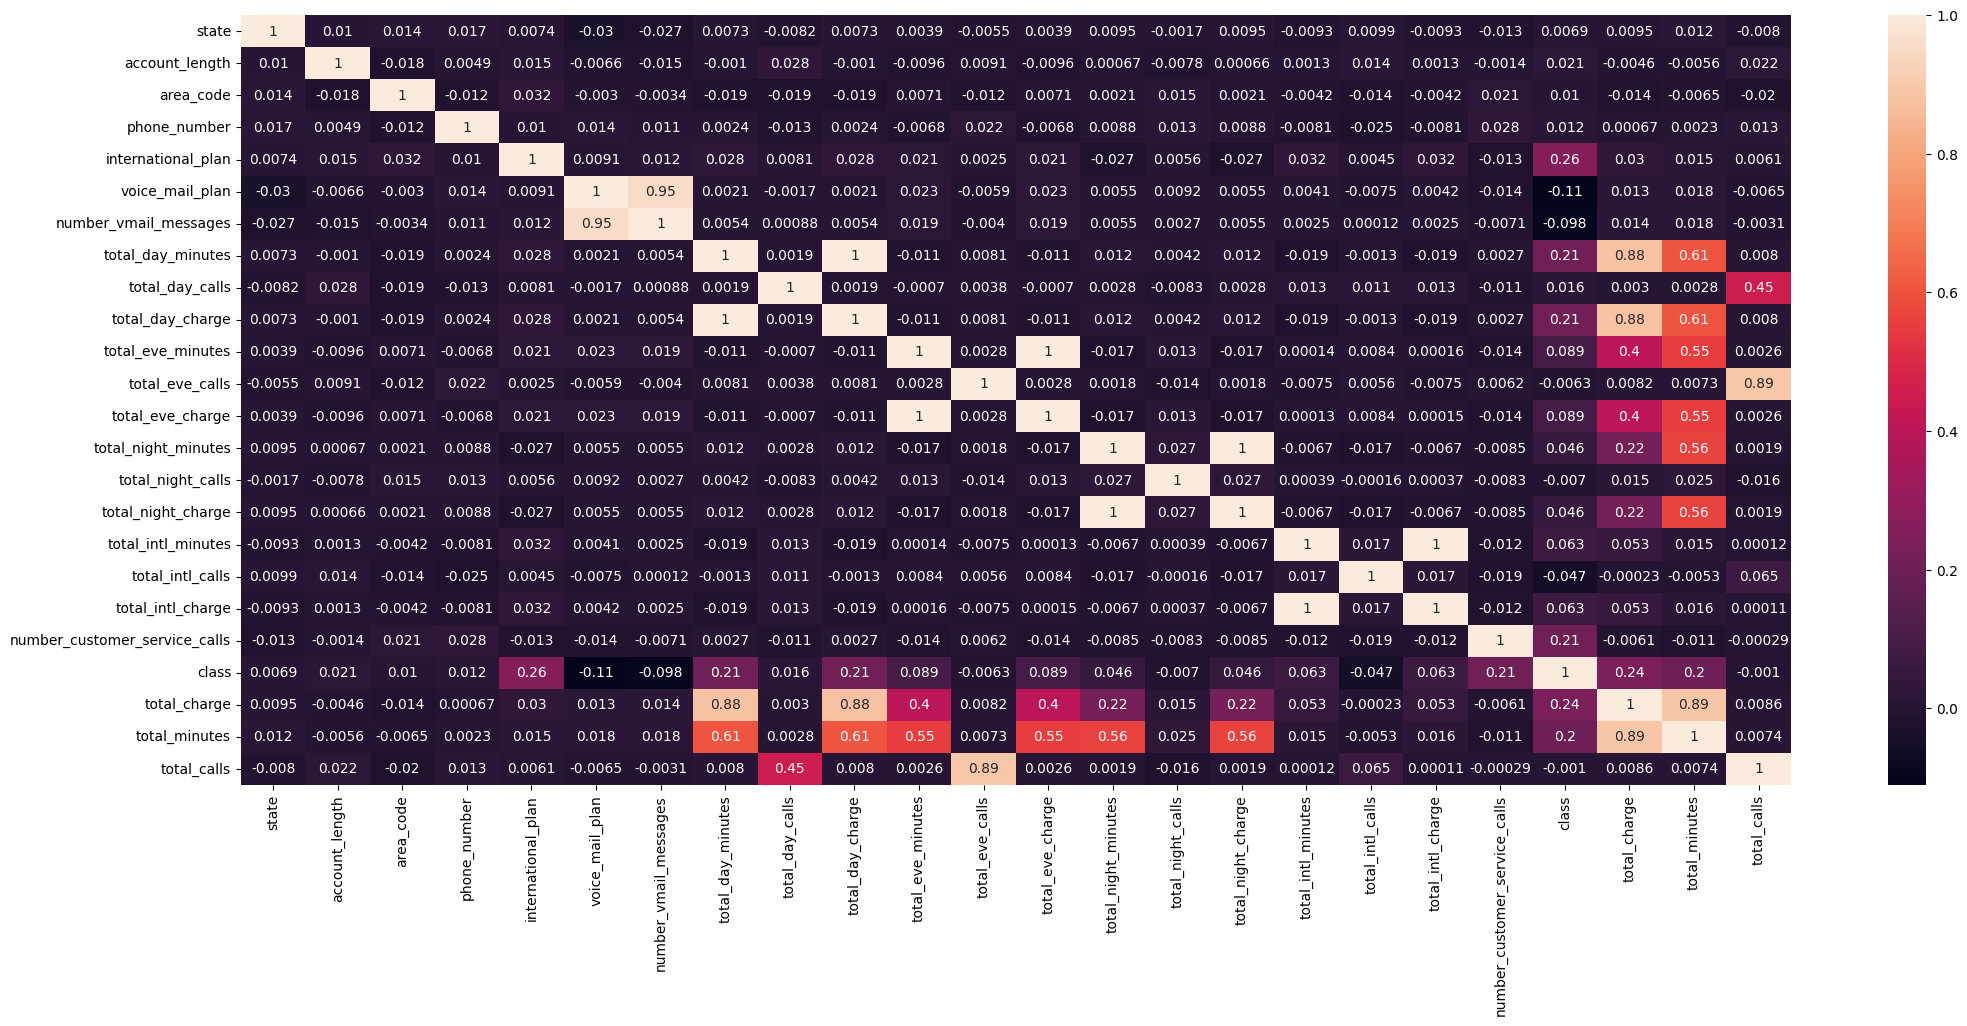

In [135]:
plt.figure(figsize=(25,10))
sns.heatmap(churn.corr(), annot=True)
plt.show()

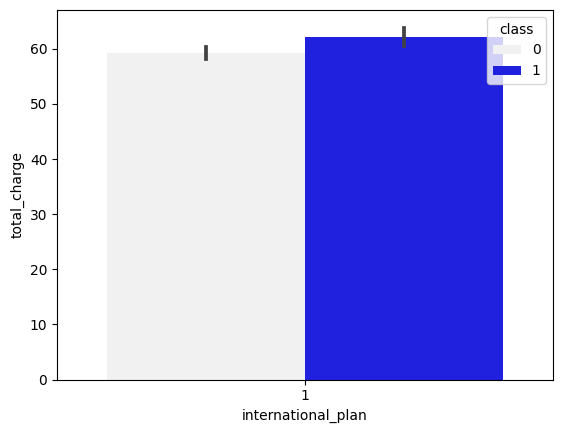

In [442]:
sns.barplot(data=churn[churn["international_plan"]==1], x="international_plan", y="total_charge", hue="class", color = 'b');

In [157]:
churn.groupby('class').mean().number_customer_service_calls

class
0    1.457722
1    2.254597
Name: number_customer_service_calls, dtype: float64

# Models

In [181]:
churn.columns

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class', 'total_charge',
       'total_minutes', 'total_calls', 'price/min_day', 'price/min_night',
       'price/min_intl'],
      dtype='object')

In [182]:
X = churn[['international_plan','total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls']]
y = churn['class']

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [184]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4000, 14)
(1000, 14)
(4000,)
(1000,)


In [185]:
print(y_train.value_counts())
print(y_test.value_counts())

0    3432
1     568
Name: class, dtype: int64
0    861
1    139
Name: class, dtype: int64


## SVM Model

In [445]:
svm_model = SVC(kernel = "linear", C=8)

In [446]:
svm_model.fit(X_train, y_train)

SVC(C=8, kernel='linear')

In [447]:
y_pred_svm = svm_model.predict(X_test)

In [448]:
classification_metrics(y_test, y_pred_svm)

Accuracy is:  0.866
Precision is:  0.5714285714285714
Recall is:  0.14388489208633093
F1-Score is:  0.22988505747126436


In [449]:
y_pred_svm_train = svm_model.predict(X_train)

In [450]:
classification_metrics(y_train, y_pred_svm_train)

Accuracy is:  0.86325
Precision is:  0.5882352941176471
Recall is:  0.12323943661971831
F1-Score is:  0.20378457059679764


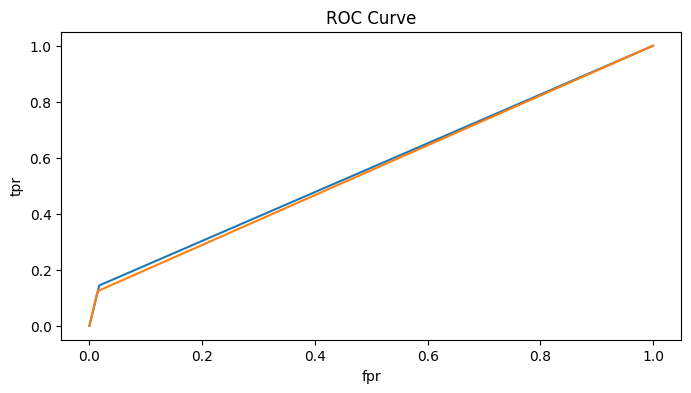

In [451]:
roc_curve_plot(y_test,y_pred_svm,y_train, y_pred_svm_train);

## The method of k-nearest neighbors KNN

In [267]:
mod_knn = KNeighborsClassifier(n_neighbors = 25) #n_neighbors=5

In [268]:
mod_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=25)

In [269]:
y_knn_pred = mod_knn.predict(X_test)

In [270]:
classification_metrics(y_test, y_knn_pred)

Accuracy is:  0.884
Precision is:  0.7948717948717948
Recall is:  0.22302158273381295
F1-Score is:  0.34831460674157305


In [271]:
y_pred_knn_train = mod_knn.predict(X_train)

In [272]:
classification_metrics(y_train, y_pred_knn_train)

Accuracy is:  0.88375
Precision is:  0.7877094972067039
Recall is:  0.2482394366197183
F1-Score is:  0.3775100401606426


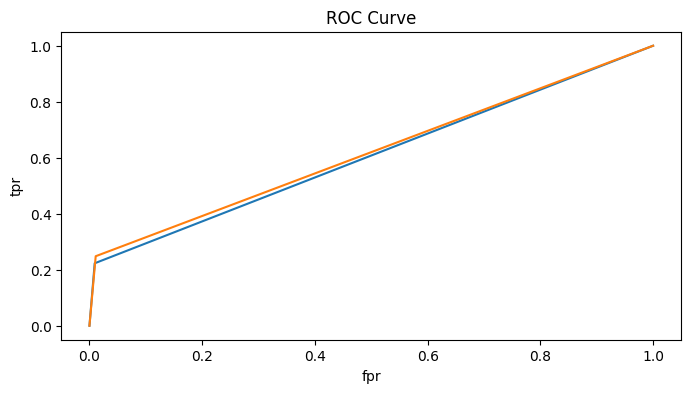

In [273]:
roc_curve_plot(y_test,y_knn_pred,y_train, y_pred_knn_train);

## Naive Bayesian Model

In [208]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [209]:
y_pred = model.predict(X_test)

In [210]:
classification_metrics(y_test, y_pred)

Accuracy is:  0.845
Precision is:  0.44871794871794873
Recall is:  0.5035971223021583
F1-Score is:  0.4745762711864407


In [211]:
y_pred_train = model.predict(X_train)

In [212]:
classification_metrics(y_train, y_pred_train)

Accuracy is:  0.8585
Precision is:  0.5018518518518519
Recall is:  0.477112676056338
F1-Score is:  0.4891696750902527


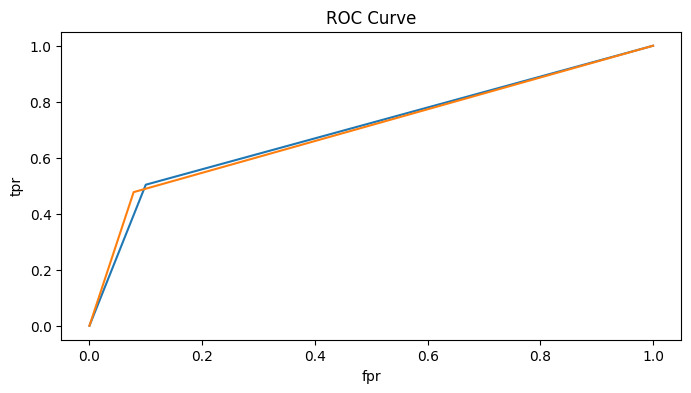

In [213]:
roc_curve_plot(y_test,y_pred,y_train, y_pred_train)

## Decision Tree Model

In [297]:
model_dt = DecisionTreeClassifier(max_depth=5)

In [298]:
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [299]:
y_pred_dt = model_dt.predict(X_test)

In [300]:
classification_metrics(y_test, y_pred_dt)

Accuracy is:  0.927
Precision is:  0.7578125
Recall is:  0.697841726618705
F1-Score is:  0.7265917602996254


In [301]:
y_pred_dt_train = model_dt.predict(X_train)

In [302]:
classification_metrics(y_train, y_pred_dt_train)

Accuracy is:  0.94
Precision is:  0.8059701492537313
Recall is:  0.7605633802816901
F1-Score is:  0.782608695652174


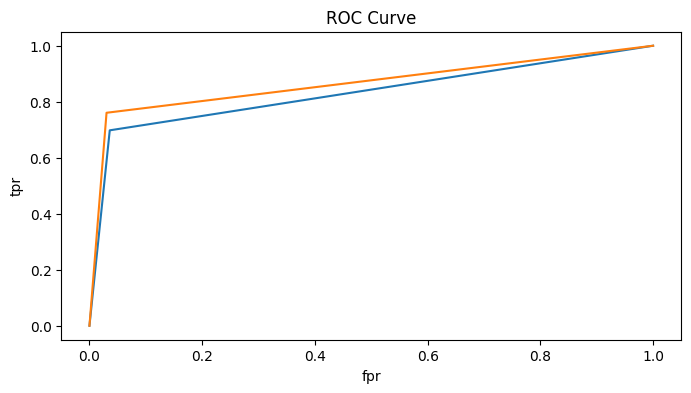

In [303]:
roc_curve_plot(y_test,y_pred_dt,y_train, y_pred_dt_train)

## Bagging Random Forest

In [395]:
RFmodel = RandomForestClassifier(max_depth = 7)

In [396]:
RFmodel.fit(X_train, y_train)

RandomForestClassifier(max_depth=7)

In [397]:
y_pred_RF = RFmodel.predict(X_test)

In [398]:
classification_metrics(y_test, y_pred_RF)

Accuracy is:  0.937
Precision is:  0.8725490196078431
Recall is:  0.6402877697841727
F1-Score is:  0.7385892116182573


In [399]:
y_pred_RF_train = RFmodel.predict(X_train)

In [400]:
classification_metrics(y_train, y_pred_RF_train)

Accuracy is:  0.95825
Precision is:  0.9465478841870824
Recall is:  0.7482394366197183
F1-Score is:  0.8357915437561456


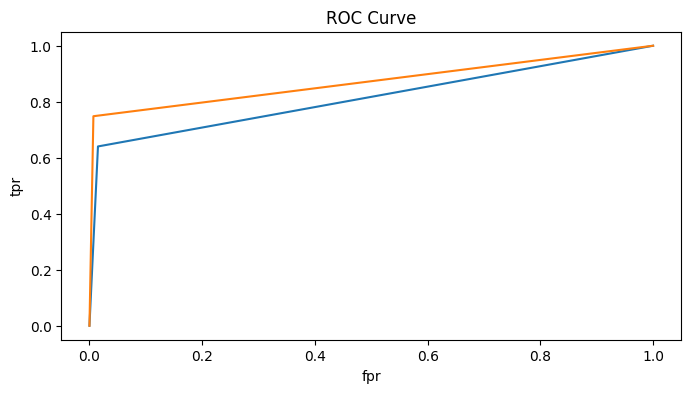

In [401]:
roc_curve_plot(y_test,y_pred_RF,y_train, y_pred_RF_train);

## Ada Boost

In [416]:
ABmodel = AdaBoostClassifier(n_estimators=80)

In [417]:
ABmodel.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=80)

In [418]:
y_pred_AB = ABmodel.predict(X_test)

In [419]:
classification_metrics(y_test, y_pred_AB)

Accuracy is:  0.884
Precision is:  0.6666666666666666
Recall is:  0.33093525179856115
F1-Score is:  0.4423076923076923


In [420]:
y_pred_AB_train = ABmodel.predict(X_train)

In [421]:
classification_metrics(y_train, y_pred_AB_train)

Accuracy is:  0.8895
Precision is:  0.6981132075471698
Recall is:  0.3908450704225352
F1-Score is:  0.5011286681715575


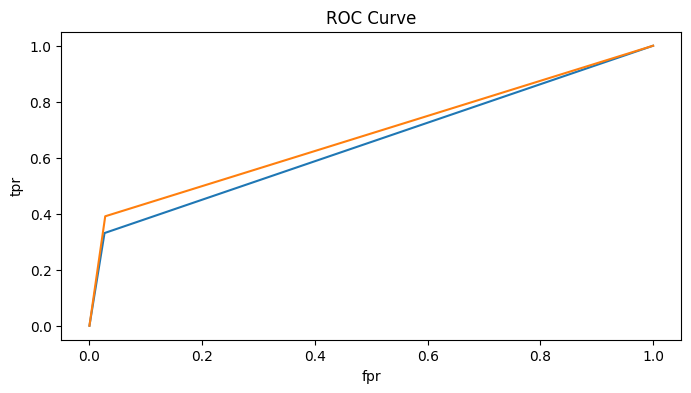

In [422]:
roc_curve_plot(y_test,y_pred_AB,y_train, y_pred_AB_train);